In [1]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#KHAI BÁO TẤT CẢ THƯ VIỆN CẦN DÙNG
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [4]:
train_data = '/content/drive/MyDrive/AI/10_Monan/TRAIN'
test_data =  '/content/drive/MyDrive/AI/10_Monan/TEST'
val_data  =  '/content/drive/MyDrive/AI/10_Monan/TEST'

In [5]:
from keras.engine.data_adapter import train_validation_split
#CHỈNH LẠI TỈ LỆ VÀ PRE-PREPROCESSING DATA

data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")


Found 295 images belonging to 10 classes.
Found 122 images belonging to 10 classes.
Found 122 images belonging to 10 classes.


In [6]:
#ĐẶT NHÃN
class_name = ['BÁNH MÌ', 'BÁNH PÍA', 'BÁNH TIÊU', 'BÁNH ƯỚT', 'BÁNH XÈO', 'CÀ RI', 'CƠM TẤM', 'MÌ XÀO', 'PHỞ', 'THỊT KHO TÀU']

#IN NHÃN VÀ ĐẶT GIÁ TRỊ CHO TỪNG PHẦN TỬ
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Tổng cộng các loại mon an: ",train_input.num_classes)

labels:  ['BÁNH MÌ', 'BÁNH PÍA', 'BÁNH TIÊU', 'BÁNH ƯỚT', 'BÁNH XÈO', 'CÀ RI', 'CƠM TẤM', 'MÌ XÀO', 'PHỞ', 'THỊT KHO TÀU']
match class:  {'BÁNH MÌ': 0, 'BÁNH PÍA': 1, 'BÁNH TIÊU': 2, 'BÁNH ƯỚT': 3, 'BÁNH XÈO': 4, 'CÀ RI': 5, 'CƠM TẤM': 6, 'MÌ XÀO': 7, 'PHỞ': 8, 'THỊT KHO TÀU': 9}
Tổng cộng các loại mon an:  10


In [7]:
#XÂY DỰNG MODEL CNN
model=Sequential()

#TRÍCH XUẤT TẬP DỮ LIỆU(FEATURE EXTRACTORS)
#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))  #10 class_name
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [8]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
food_train = model.fit(train_input,batch_size=30,epochs=100,verbose=1,validation_data=val_input)

Epoch 1/100
10/10 [==============================] - 133s 13s/step - loss: 25.4834 - accuracy: 0.1085 - val_loss: 2.3005 - val_accuracy: 0.0902
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 2.3946 - accuracy: 0.1017 - val_loss: 2.2952 - val_accuracy: 0.1311
Epoch 3/100
10/10 [==============================] - 13s 1s/step - loss: 2.3114 - accuracy: 0.1153 - val_loss: 2.3023 - val_accuracy: 0.1148
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: 2.2994 - accuracy: 0.1254 - val_loss: 2.3023 - val_accuracy: 0.1311
Epoch 5/100
10/10 [==============================] - 13s 1s/step - loss: 2.2954 - accuracy: 0.1186 - val_loss: 2.2839 - val_accuracy: 0.0984
Epoch 6/100
10/10 [==============================] - 13s 1s/step - loss: 2.2955 - accuracy: 0.1220 - val_loss: 2.2965 - val_accuracy: 0.2049
Epoch 7/100
10/10 [==============================] - 13s 1s/step - loss: 2.2490 - accuracy: 0.1356 - val_loss: 2.1855 - val_accuracy: 0.1967
Epoch 8/10

In [10]:
model.save('/content/drive/MyDrive/AI/10_Monan/Food.h5')

array([4])

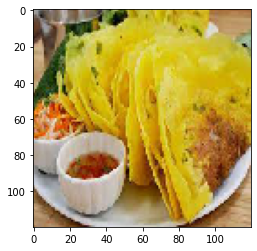

In [33]:
pic = image.load_img('/content/drive/MyDrive/AI/10_Monan/BANHXEO.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [34]:
# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Loai do an: BANH MI")
if guess[0]==1:
  print("Loai do an: BANH PIA")
if guess[0]==2:
  print("Loai do an: BANH TIEU")
if guess[0]==3:
  print("Loai do an: BANH UOT")
if guess[0]==4:
  print("Loai do an: BANH XEO")
if guess[0]==5:
  print("Loai do an: CA RI")
if guess[0]==6:
  print("Loai do an: COM TAM")
if guess[0]==7:
  print("Loai do an: MI XAO")
if guess[0]==8:
  print("Loai do an: PHO")
if guess[0]==9:
  print("Loai do an: THIT KHO TAU")

Loai do an: BANH XEO
